<a href="https://colab.research.google.com/github/sagarjhaa/TensorFlow-HandWrittenNumber/blob/master/MNIST_just_code_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function
import keras # a machine learning library that lets you create neural networks
from keras.datasets import mnist # the needed dataset
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten, Activation # importing different types of layers that you can use with your model
from keras.layers import Conv2D, MaxPooling2D, MaxPooling1D # same as above
from keras import backend as K
import random # lets us generate random numbers - used when looking at random entries from the dataset.
import matplotlib # lets us display images
import numpy as np # library for delaing with arrays of numbers - the data is represented as an array
import tensorflow as tf # the backend machine learning library that keras relies on
import matplotlib.pyplot as plt #for charts at end

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # downloading the MNIST dataset


['000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000']
['000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000']
['000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000']
['000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000']
['000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000']
['000', '000', 

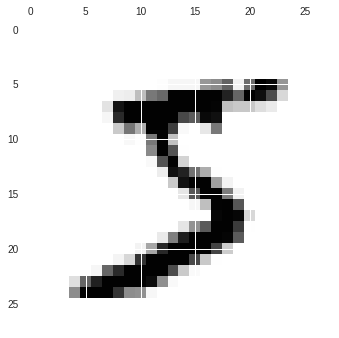

In [0]:
np_x_train = np.array(x_train[0]).reshape(28,28).tolist()

for i in range(0,len(np_x_train)):
  #print(np_x_train[i])
  print(list(map(lambda x : "{0:0=3d}".format(x),np_x_train[i])))

matplotlib.pyplot.matshow(x_train[0])
# print("Size of the array : " + str(x_train[0].shape))
# matplotlib.pyplot.matshow(x_train[157])
print("The ground truth for this entry is: " + str((y_train[0])))

In [0]:
# just defining some parameters to train the network
batch_size = 1#128
num_classes = 10 # how many different "classes" of numbers there are
epochs = 5 # how many times the network will look at the entire dataset

In [0]:
img_rows, img_cols = 28, 28 # the "shape" of the input data; we need to define that the images are 28x28, 

In [0]:
if K.image_data_format() == 'channels_first': # code for flattening the images into 28x28x1 (black and white) instead of 28x28x3 (rgb full color images)
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'numbers the network will learn from (train on)')
print(x_test.shape[0], 'numbers the network will not learn from (will only be used for testing)')

In [0]:
# One hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()

# your neural network goes here:
# ----------------------------- #


model.add(Flatten(input_shape=input_shape))
model.add(Dense(128, activation='tanh'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128))

#model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(num_classes, activation=Activation(tf.nn.softmax)))


# ----------------------------- #
# end your neural network

model.summary()

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
validation_data=(x_test, y_test))

import matplotlib.pyplot as plt

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('step')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])